Name :  Arivazhagan.B

Topic : Telecom Customer Segmentation using Classification Algorithms

Email : barivazhagan8@gmail.com

## Project Title :

***Telecom Customer Segmentation using Classification Algorithm***

## Objective:

To build and evaluate machine  learning model that classfy telecom customers into one of four customer categories(custcat)

based on their demographic and socioeconomic features.This classification can support targeted marketing ,customer retention 

strategies, and service optimization.

## Dataset Summary:

* **Total records**: 1000 customers

* **Features**:

  * **Demographic**: age,gender,marital,reside,region

  * **Socioeconomic**:income,education(ed),employment years (employ),retired status (retire)

  * **Customer profile**: tenure,address

* **Target variable**:cuscat(Customer Category:1 to 4)

## Project Steps:

** Load Datasets **

In [33]:
import pandas as pd 
import numpy  as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

** Load Dataset **

In [11]:
df=pd.read_csv(r'C:\Users\ELCOT\Desktop\Excel Excercise\New folder\telecom_cus.csv')
df

region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9      64   4       5       0   
1         3      11   33        1        7     136   5       5       0   
2         3      68   52        1       24     116   1      29       0   
3         2      33   33        0       12      33   2       0       0   
4         2      23   30        1        9      30   1       2       0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0      27   3       0       0   
996       1       7   34        0        2      22   5       5       0   
997       3      67   59        0       40     944   5      33       0   
998       3      70   49        0       18      87   2      22       0   
999       3      50   36        1        7      39   3       3       0   

     gender  reside  custcat  
0         0       2        1  
1         0       6        4  
2         1       2        3  
3         1       1        1  
4         0       4        3  
..      ...     ...      ...  
995       1       3        1  
996       1       1        1  
997       1       1        4  
998       1       1        3  
999       1       3        2  

[1000 rows x 12 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int64
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   marital  1000 non-null   int64
 4   address  1000 non-null   int64
 5   income   1000 non-null   int64
 6   ed       1000 non-null   int64
 7   employ   1000 non-null   int64
 8   retire   1000 non-null   int64
 9   gender   1000 non-null   int64
 10  reside   1000 non-null   int64
 11  custcat  1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [18]:
df.describe()

region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000     1.000000    18.000000     0.000000     0.000000   
25%       1.0000    17.000000    32.000000     0.000000     3.000000   
50%       2.0000    34.000000    40.000000     0.000000     9.000000   
75%       3.0000    54.000000    51.000000     1.000000    18.000000   
max       3.0000    72.000000    77.000000     1.000000    55.000000   

            income           ed       employ       retire       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     77.535000     2.671000    10.987000     0.047000     0.517000   
std     107.044165     1.222397    10.082087     0.211745     0.499961   
min       9.000000     1.000000     0.000000     0.000000     0.000000   
25%      29.000000     2.000000     3.000000     0.000000     0.000000   
50%      47.000000     3.000000     8.000000     0.000000     1.000000   
75%      83.000000     4.000000    17.000000     0.000000     1.000000   
max    1668.000000     5.000000    47.000000     1.000000     1.000000   

            reside      custcat  
count  1000.000000  1000.000000  
mean      2.331000     2.487000  
std       1.435793     1.120306  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       2.000000     3.000000  
75%       3.000000     3.000000  
max       8.000000     4.000000

In [22]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

## Exploratory Data Analysis (EDA)

** Target variable distribution **

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4136\1309758259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='custcat',palette='rainbow')


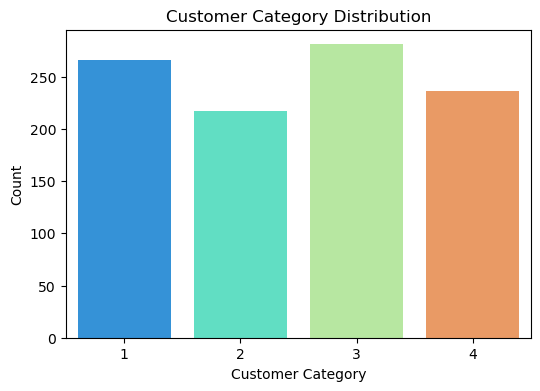

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='custcat',palette='rainbow')
plt.title('Customer Category Distribution')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.show()

** Correlation heatmap **

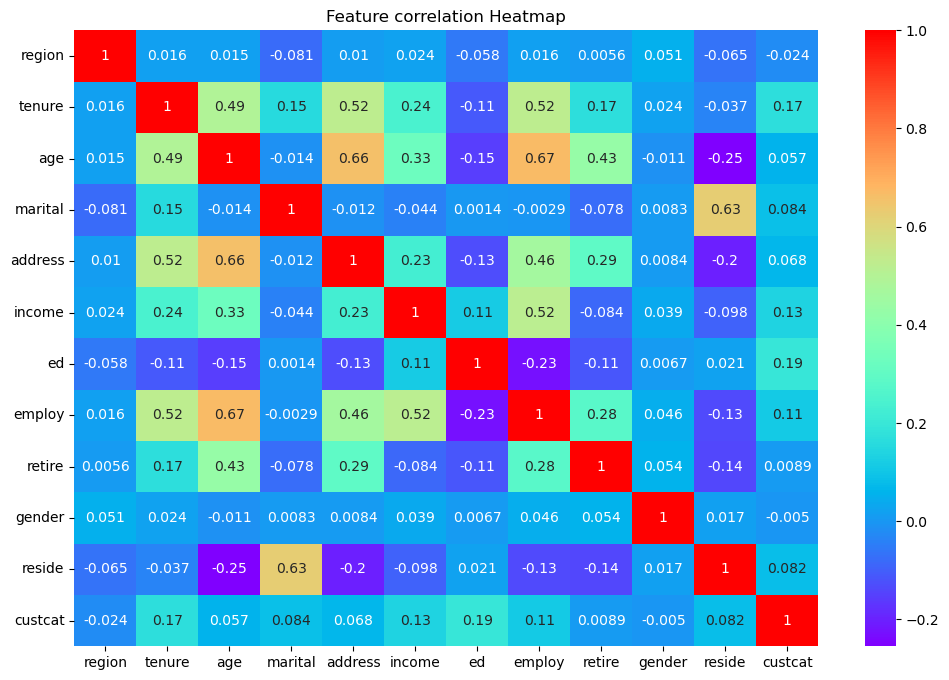

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.title("Feature correlation Heatmap")
plt.show()

** Pairplot of selected  features **

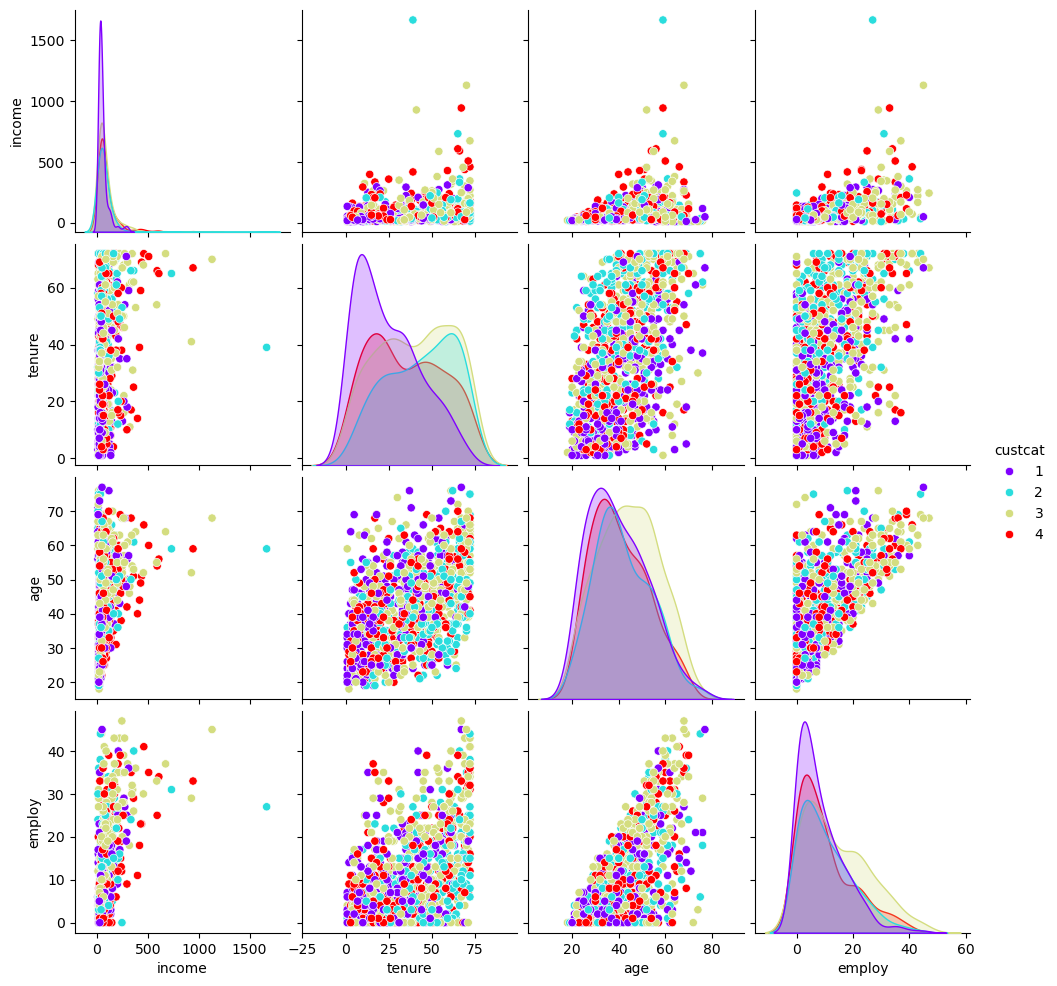

In [41]:
selected_features=['income','tenure','age','employ']
sns.pairplot(df[selected_features+['custcat']],hue='custcat',palette='rainbow')
plt.show()

** Boxplots for  numerical features **

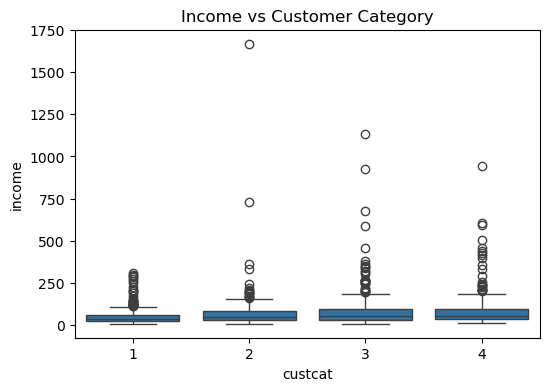

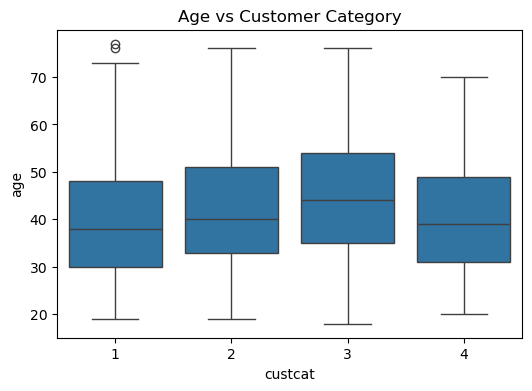

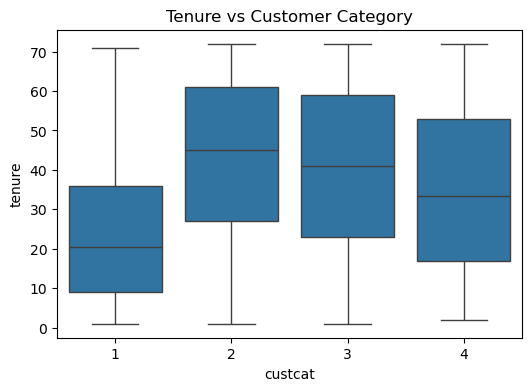

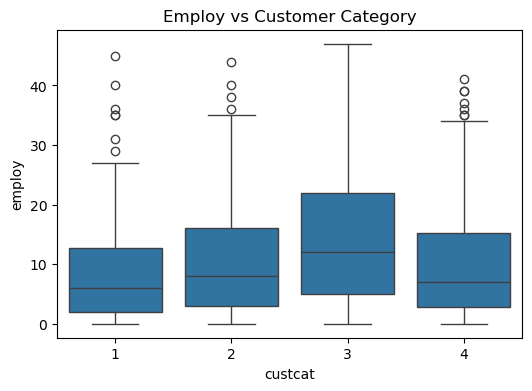

In [46]:
for col in ['income','age','tenure','employ']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df,x='custcat',y=col)
    plt.title(f'{col.capitalize()} vs Customer Category')
    plt.show()

** Segregate data into Feature and Target **

In [13]:
x=df.drop('custcat',axis=1)
y=df['custcat']

** Split data into Training and Testing **

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Scale the Feature**

** StandardScaler-It is used to standardizes numerical values by removing the mean and scaling to unit variance **

In [17]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


** Build and Train the model **

In [39]:
model= LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
model.fit(x_train_scaled,y_train)

D:\hari\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

** Predictions **

In [42]:
y_pred=model.predict(x_test_scaled)

** Evaluation **

In [85]:
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(f"Accuracy: {acc*100:.2f}%")
print("Confusion Matrix")
print(cm)
print("prediction:",y_pred)

Accuracy: 44.00%
Confusion Matrix
[[26  9 13 12]
 [ 5 13 13  8]
 [12  7 29  7]
 [12  8  6 20]]
prediction: [3 4 2 3 1 3 4 3 1 2 4 3 2 3 1 4 4 4 1 4 1 2 3 1 1 3 2 4 2 4 3 4 3 1 2 1 1
 2 2 4 1 3 4 3 3 2 3 1 1 4 1 3 1 1 3 3 3 1 4 1 3 2 1 2 3 4 1 4 3 1 1 4 3 4
 2 3 3 3 3 1 4 4 2 3 1 3 2 4 4 3 2 4 3 2 3 2 2 4 2 1 3 3 1 4 4 4 1 4 1 3 4
 4 4 1 1 1 3 3 3 3 3 2 4 3 4 2 3 2 1 3 1 4 3 1 3 3 3 2 1 1 2 3 4 4 1 3 3 1
 4 3 1 4 4 3 2 1 2 3 3 1 4 1 4 1 1 1 2 3 3 4 1 2 2 3 3 2 1 1 1 1 3 2 2 3 1
 4 2 4 2 1 2 1 1 4 3 2 1 4 4 3]


## Model Accuracy Comparision

* Logistic Regression: 44.00%

* Logistic Regression performed best and was selected

## Key Insights 

* Income,employment,and tenure are Influential features

* Logistisc Regression offered balance and Interpretability

* Complex models didn't outperform simpler ones due to data size/structure

## Conclusion:

* The project successfully demonstrated how ML can be used to classify telecom customers.

* The model can help target marketing efforts and improve customer retention.